In [2]:
%run load-packages.ipynb
%run stats-libs.ipynb

3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
Matplotlib version 3.2.2
Numpy version 1.18.5
Pandas version 1.0.5
Scipy version 1.5.0
Seaborn version 0.10.1
Statsmodels version 0.11.1
Sklearn version 0.23.1

Set Pandas float printout to three digits ... 


Enabling interactive shell outputs ...
   Use command pass; to disable cell text outputs

Setting seaborn and matplotlib graphic parameters ...


Load custom statistics functions  ... 
check_anova_normality(group, x)  ...
check_normality(x)  ...
gen_factorial_matrix(num_factors, interaction=True, num_replications=1)  ...
check_linreg_residuals(model)  ...
lr_logit_test(model)  ...
pseudo_r2(model, y)  ...
gof_logit_test(model, y)  ...


## Napong Leelasithorn 61070505228

## 1. 
Consider the study of the network throughput over a WiFi link. The testbed has a
few nodes uploading a large file to a IEEE 802.11b wireless access point.<br>
A $2^3$ design with the following factors are conducted and the throughputs in
kBytes/sec are collected:<br>
A: Distance from access point (5m, 50m)<br>
B: Number of nodes (2, 10)<br>
C: Frame size (500B, 1400B)<br>
Analysis the data and draw conclusions. How does the decrease in the number of nodes
affect the throughput?

In [2]:
pd.options.display.float_format = "{:,.4f}".format
wifi = pd.read_excel('lect07-2k-factorial.xlsx', sheet_name = 'WiFiThruput').rename(columns ={'Unnamed: 3':'rep1',
                                                                                              'Unnamed: 4':'rep2',
                                                                                              'Unnamed: 5':'rep3',
                                                                                              'Unnamed: 6':'rep4',
                                                                                              'Unnamed: 7':'rep5'})
wifi

,Factor A,Factor B,Factor C,rep1,rep2,rep3,rep4,rep5,Total
0,-1,-1,-1,93.5400,96.4000,93.3800,92.9100,90.7000,466.9300
1,1,-1,-1,94.9800,90.0900,96.2400,98.9700,92.0200,472.3000
2,-1,1,-1,89.1700,89.1600,85.4900,86.5800,86.1200,436.5200
3,1,1,-1,84.7400,87.4800,83.5300,91.8500,84.8900,432.4900
4,-1,-1,1,112.4100,113.9700,106.7900,110.3400,109.9300,553.4400
5,1,-1,1,105.9900,111.5700,107.6300,115.0400,108.3800,548.6100
6,-1,1,1,95.2700,96.4600,87.9200,88.3800,94.4100,462.4400
7,1,1,1,91.3000,94.5700,94.9500,94.6300,96.3700,471.8200


In [3]:
wifi_eff = pd.DataFrame({'Intercept': [1]*8})
wifi_eff[['Factor A', 'Factor B', 'Factor C']] = wifi[['Factor A', 'Factor B', 'Factor C']]
wifi_eff['AB'] = wifi['Factor A']* wifi['Factor B']
wifi_eff['AC'] = wifi['Factor A']* wifi['Factor C']
wifi_eff['BC'] = wifi['Factor B']* wifi['Factor C']
wifi_eff['ABC'] = wifi['Factor A']* wifi['Factor B']*wifi['Factor C']
y = wifi.iloc[:,3:8]
total = wifi['Total']
wifi_eff, y, total

(   Intercept  Factor A  Factor B  Factor C  AB  AC  BC  ABC
 0          1        -1        -1        -1   1   1   1   -1
 1          1         1        -1        -1  -1  -1   1    1
 2          1        -1         1        -1  -1   1  -1    1
 3          1         1         1        -1   1  -1  -1   -1
 4          1        -1        -1         1   1  -1  -1    1
 5          1         1        -1         1  -1   1  -1   -1
 6          1        -1         1         1  -1  -1   1   -1
 7          1         1         1         1   1   1   1    1,
       rep1     rep2     rep3     rep4     rep5
 0  93.5400  96.4000  93.3800  92.9100  90.7000
 1  94.9800  90.0900  96.2400  98.9700  92.0200
 2  89.1700  89.1600  85.4900  86.5800  86.1200
 3  84.7400  87.4800  83.5300  91.8500  84.8900
 4 112.4100 113.9700 106.7900 110.3400 109.9300
 5 105.9900 111.5700 107.6300 115.0400 108.3800
 6  95.2700  96.4600  87.9200  88.3800  94.4100
 7  91.3000  94.5700  94.9500  94.6300  96.3700,
 0   466.9300
 1 

## problem 1. outline

1. Regression<br>
2. Effect Estimate<br>
3. Main effect and Interaction Plot<br>
4. ANOVA table


## Regression

In [4]:
wifiz = pd.DataFrame({'res': pd.concat([y['rep1'], y['rep2'], y['rep3'], y['rep4'], y['rep5']])})
wifiz[['Intercept','A','B','C','AB','AC','BC','ACB']] = wifi_eff
wifiz

,res,Intercept,A,B,C,AB,AC,BC,ACB
0,93.5400,1,-1,-1,-1,1,1,1,-1
1,94.9800,1,1,-1,-1,-1,-1,1,1
2,89.1700,1,-1,1,-1,-1,1,-1,1
3,84.7400,1,1,1,-1,1,-1,-1,-1
4,112.4100,1,-1,-1,1,1,-1,-1,1
5,105.9900,1,1,-1,1,-1,1,-1,-1
6,95.2700,1,-1,1,1,-1,-1,1,-1
7,91.3000,1,1,1,1,1,1,1,1
0,96.4000,1,-1,-1,-1,1,1,1,-1
1,90.0900,1,1,-1,-1,-1,-1,1,1


### Regression Model of Coded variables
<br>
 $$ Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_{12} x_1 x_2 + ... + \beta_{123} x_1 x_2 x_3 + \epsilon$$<br>
where<br>
<br>
$ Y $= Throughputs <br>
$ \beta_0$ = Total mean <br>
$ \beta_1$ = $\frac{1}{2} $(Main effect of A) <br>
$ \beta_2$ = $\frac{1}{2} $(Main effect of B) <br>
$ \beta_3$ = $\frac{1}{2} $(Main effect of C) <br><br>

using $\alpha = 0.05 $ and degree of freedom = 32

In [5]:
mod = sm.OLS(wifiz['res'], wifiz.drop('res', axis = 1)).fit()
mod.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.894   
Dependent Variable: res              AIC:                207.6170
Date:               2020-10-28 21:58 BIC:                221.1281
No. Observations:   40               Log-Likelihood:     -95.809 
Df Model:           7                F-statistic:        48.17   
Df Residuals:       32               Prob (F-statistic): 3.27e-15
R-squared:          0.913            Scale:              8.8083  
------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept    96.1137    0.4693  204.8188  0.0000  95.1579  97.0696
A             0.1472    0.4693    0.3138  0.7557  -0.8086   1.1031
B            -5.9503    0.4693  -12.6800  0.0000  -6.9061  -4.9944
C             5.7017    0.4693   12.1505  0.0000   4.7459   6.6576
AB            0.1203    0.4693    0.2563  0.7994  -0.8356   1.0761
AC            0.0803    0.4693    0.1710  0.8653  -0.8756   1.0361
BC           -2.4393    0.4693   -5.1981  0.0000  -3.3951  -1.4834
ACB           0.5903    0.4693    1.2578  0.2176  -0.3656   1.5461
-----------------------------------------------------------------
Omnibus:              1.491        Durbin-Watson:           2.235
Prob(Omnibus):        0.474        Jarque-Bera (JB):        1.118
Skew:                 0.148        Prob(JB):                0.572
Kurtosis:             2.236        Condition No.:           1    
=================================================================

"""

From our hypothesis, <br>$H_0: \beta_i = 0 $<br>$H_a: \beta_i \neq 0 $ <br> B, C and interaction of BC are statistically significant at $ \alpha = 0.05 $ (p-value < $\alpha$, C.I. = Effect estimate $\pm t_{\alpha/2;N-p}$Se(Effect) not including 0)

In [6]:
# ex. find p-val A
scipy.stats.t.sf(.3138, 32)*2

0.7557094835063697

## Effect estimate and Sum of Square

#### Calculate a list which contains SSA, SSB, SSC, .. SSABC

In [7]:
wifi_eff1 = wifi_eff.drop('Intercept', axis = 1)
for i in wifi_eff1.columns:
    wifi_eff1[i] *= total

# wifi_eff1.sum() = contrast
effect_es = list((wifi_eff1.sum()/20).values)
sum_sq = list((wifi_eff1.sum()**2/40).values)
effect_es, sum_sq

([0.2944999999999965,
  -11.900500000000003,
  11.4035,
  0.24050000000001148,
  0.16050000000000467,
  -4.8785,
  1.1804999999999979],
 [0.8673024999999793,
  1416.2190025000004,
  1300.3981225,
  0.5784025000000552,
  0.25760250000001494,
  237.99762249999998,
  13.935802499999948])

#### Create an effect estimate table with percent contribution

In [8]:
perct = pd.DataFrame({' ': ['A','B','C','AB','AC','BC','ABC'],
                     'Effect estimate': effect_es,
                     'Sum of Square': sum_sq}).set_index(' ')
perct['Percent Contribution'] = perct['Sum of Square'].apply(lambda x: (x/perct['Sum of Square'].sum())*100)
perct

,Effect estimate,Sum of Square,Percent Contribution
,,,
A,0.2945,0.8673,0.0292
B,-11.9005,"1,416.2190",47.6801
C,11.4035,"1,300.3981",43.7807
AB,0.2405,0.5784,0.0195
AC,0.1605,0.2576,0.0087
BC,-4.8785,237.9976,8.0127
ABC,1.1805,13.9358,0.4692


B has negative effect on response. That mean, decreasing in number of nodes increase the throughput <br>
C(FrameSize) has positive effect and BC has negative effect. So, increasing in BC together also decrease the throughput


#### Main effect and interaction plot

Text(0.5, 0, '#Nodes')

Text(0, 0.5, 'Average throughputs')

Text(0.5, 0, 'Frame size')

Text(0, 0.5, 'Average throughputs')

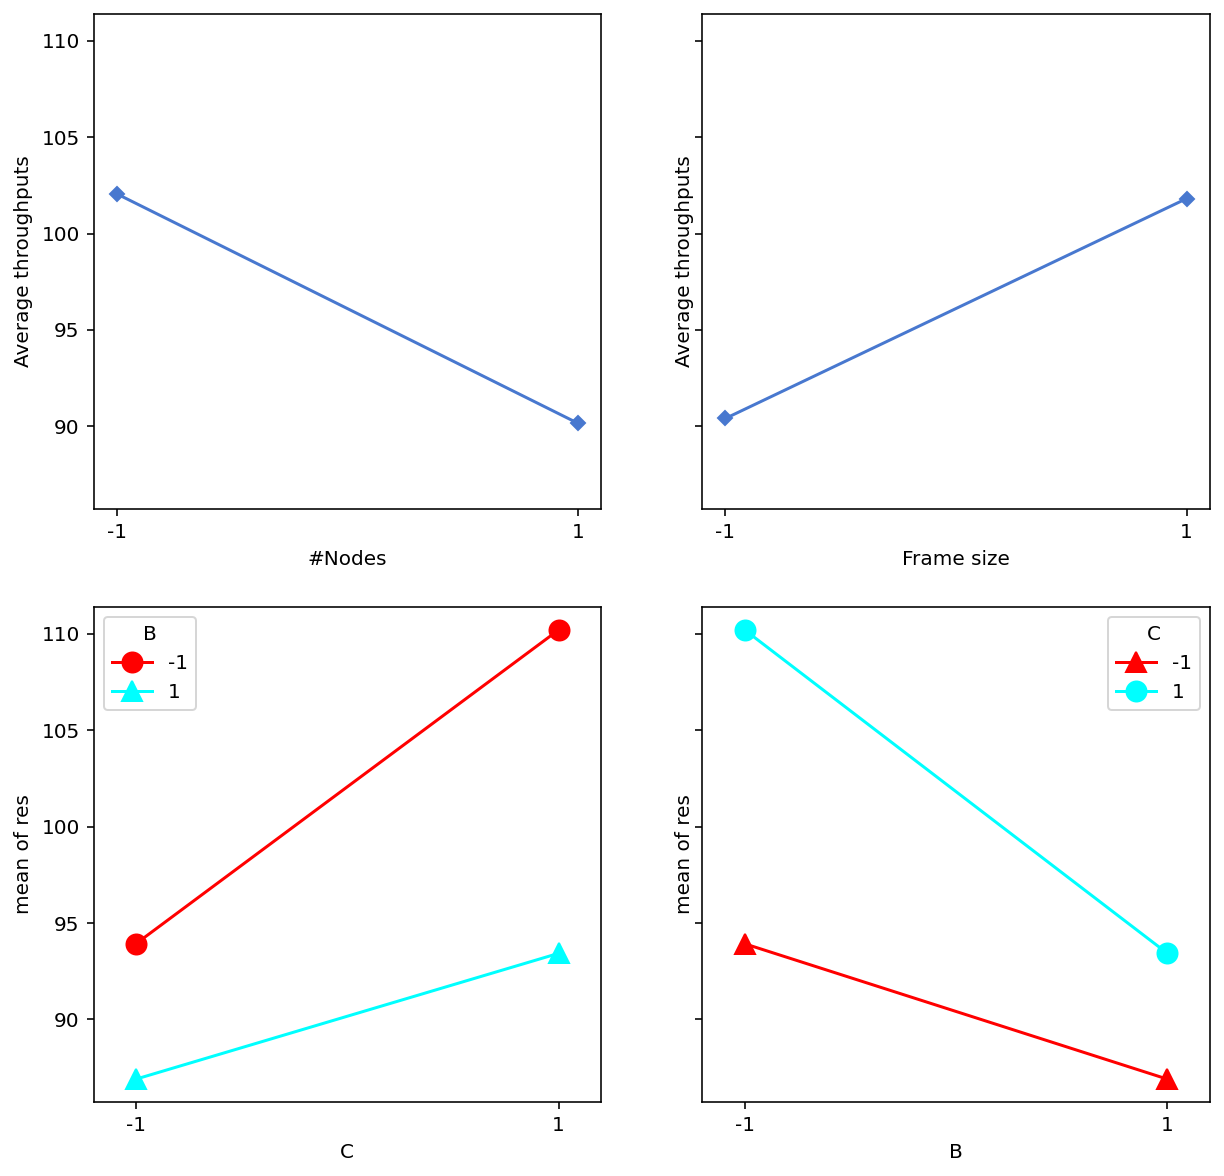

In [9]:
from statsmodels.graphics.factorplots import interaction_plot

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True, figsize=(10,10)) 

# Main effect B
eff_B = ((wifiz.groupby('B')[['res']].sum())/20).reset_index()
ax1.plot(eff_B.B.astype(str), eff_B.res, ms = 5, marker = 'D')
ax1.set_xlabel('#Nodes')
ax1.set_ylabel('Average throughputs')

# Main effect C
eff_C = wifiz.groupby('C')[['res']].mean().reset_index()
ax2.plot(eff_C.C.astype(str), eff_C.res, ms = 5, marker = 'D')
ax2.set_xlabel('Frame size')
ax2.set_ylabel('Average throughputs')

# B at C
figure = interaction_plot(wifiz['C'].astype(str), wifiz['B'].astype(str), wifiz['res'],
                         markers = ['o','^'], ms = 10, ax = ax3)

# C at B
figure = interaction_plot(wifiz['B'].astype(str), wifiz['C'].astype(str), wifiz['res'],
                         markers = ['^','o'], ms = 10, ax = ax4)

From Interaction plots, high number of nodes can decrease the rate of increasing in throughput along the Frame size 

## Create ANOVA table

#### Compute SST and SSE

In [10]:
sst = (sum(sum(y.to_numpy()**2)) - sum(total)**2/40)
sse = sst - sum(sum_sq)
sum_sq.append(sse)
sum_sq.append(sst)
sum_sq

[0.8673024999999793,
 1416.2190025000004,
 1300.3981225,
 0.5784025000000552,
 0.25760250000001494,
 237.99762249999998,
 13.935802499999948,
 281.8650799998786,
 3252.1189374998794]

#### ANOVA table

In [11]:
# Create DataFrame
anovatable = pd.DataFrame({' ': ['A','B','C','AB','AC','BC','ABC','Error', 'Total'],
                          'sum_sq': sum_sq,
                          'df': [1,1,1,1,1,1,1,32,39]}).set_index(' ')

# Calculate MSeffect from SSeffect/df
anovatable['mean_sq'] = anovatable['sum_sq']/anovatable['df']

# F = MSeffect/MSE
anovatable['F'] = anovatable['sum_sq']/anovatable.iloc[-2, 2]
anovatable['PR(>F)'] = anovatable['F'].apply(lambda x: stats.f.sf(x, 1, 32))
anovatable.iloc[-2:,-2:] = np.NaN
anovatable.iloc[-1:,2] = np.NaN
anovatable

,sum_sq,df,mean_sq,F,PR(>F)
,,,,,
A,0.8673,1,0.8673,0.0985,0.7557
B,"1,416.2190",1,"1,416.2190",160.7826,0.0000
C,"1,300.3981",1,"1,300.3981",147.6335,0.0000
AB,0.5784,1,0.5784,0.0657,0.7994
AC,0.2576,1,0.2576,0.0292,0.8653
BC,237.9976,1,237.9976,27.0197,0.0000
ABC,13.9358,1,13.9358,1.5821,0.2176
Error,281.8651,32,8.8083,nan,nan
Total,"3,252.1189",39,nan,nan,nan


In [ ]:
 stats.f.sf(x, 1, 32)

<br>Both regression and ANOVA table give the same p-value of each factor in $2^k$ design. <br>
Conclusion for this study: B(#Nodes-2,10),C(Frame size-500B,4000B ) and interaction of BC have an effect on the throughput. the Larger frame size leading higher throughput. high number of nodes lead lower throughput, and make the throughput of frame size 500 to 4000 increase with a lower rate.

# 2.
An experiment was performed to improve the yield of a
chemical process. Four factors were selected, and two
replicates of a completely randomized experiment were
run.<br><br>
(a) Estimate the factor effects.<br>
(b) Prepare an analysis of variance table and determine which factors are important in explaining yield.<br>
(c) Write down a regression model for predicting yield, assuming that all four factors were varied over the range from -1 to +1 (in coded units)<br>
(d) Plot the residual versus the predicted yield and on a normal probability scale. Does the residual analysis appear satisfactor.

### Create Design Matrix

In [3]:
chemyield = pd.DataFrame({'A':[-1,1]*8,
                          'B':[-1,-1,1,1]*4,
                          'C':[-1,-1,-1,-1,1,1,1,1]*2,
                          'D':np.repeat([-1,1],8)})

chemyield['AB'] = chemyield['A']*chemyield['B']
chemyield['AC'] = chemyield['A']*chemyield['C']
chemyield['AD'] = chemyield['A']*chemyield['D']
chemyield['BC'] = chemyield['B']*chemyield['C']
chemyield['BD'] = chemyield['B']*chemyield['D']
chemyield['CD'] = chemyield['C']*chemyield['D']
chemyield['ABC'] = chemyield['A']*chemyield['B']*chemyield['C']
chemyield['ABD'] = chemyield['A']*chemyield['B']*chemyield['D']
chemyield['ACD'] = chemyield['A']*chemyield['C']*chemyield['D']
chemyield['BCD'] = chemyield['B']*chemyield['C']*chemyield['D']
chemyield['ABCD'] = chemyield['A']*chemyield['B']*chemyield['C']*chemyield['D']

chemyield['rep1'] = [90,74,81,83,77,81,88,73,98,72,87,85,99,79,87,80]
chemyield['rep2'] = [93,78,85,80,78,80,82,70,95,76,83,86,90,75,84,80]

chemyield

,A,B,C,D,AB,AC,AD,BC,BD,CD,ABC,ABD,ACD,BCD,ABCD,rep1,rep2
0,-1,-1,-1,-1,1,1,1,1,1,1,-1,-1,-1,-1,1,90,93
1,1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,-1,-1,74,78
2,-1,1,-1,-1,-1,1,1,-1,-1,1,1,1,-1,1,-1,81,85
3,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,1,1,1,83,80
4,-1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,1,-1,77,78
5,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,1,-1,1,1,81,80
6,-1,1,1,-1,-1,-1,1,1,-1,-1,-1,1,1,-1,1,88,82
7,1,1,1,-1,1,1,-1,1,-1,-1,1,-1,-1,-1,-1,73,70
8,-1,-1,-1,1,1,1,-1,1,-1,-1,-1,1,1,1,-1,98,95
9,1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,1,1,72,76


### a) Estimate the factor effects

Since,<br><br>
<center>Effect estimate $=\frac{Contrast_{effect}}{2^{k-1}n}$<br><br>

Therefore, contrast must be calculated first.<br>
(k = 4, n = 2 in this case)

### Contrast

Total Y

In [4]:
total_y = chemyield['rep1']+chemyield['rep2']
total_y

0     183
1     152
2     166
3     163
4     155
5     161
6     170
7     143
8     193
9     148
10    170
11    171
12    189
13    154
14    171
15    160
dtype: int64

In [5]:
tmp = chemyield.drop(columns = ['rep1', 'rep2'])
for i in tmp.columns:
    tmp[i] *= total_y
print('Contrast:')
tmp.sum()

Contrast:


A      -145
B       -21
C       -43
D        63
AB       65
AC       11
AD      -35
BC       -9
BD       -3
CD       27
ABC     -83
ABD      75
ACD     -15
BCD     -15
ABCD     39
dtype: int64

### Effect estimate

In [6]:
# k = #Factor, n = #replicate
k = 4
n = 2
effect_es = pd.DataFrame({' ': chemyield.columns[:-2],
                         'Effect Estimate': list(tmp.sum().values/((2**(k-1))*n)),
                         'Sum of Square': list((tmp.sum().values**2)/32)}).set_index(' ')

effect_es['Percent Contribution'] = effect_es['Sum of Square'].apply(lambda x: (x/effect_es['Sum of Square'].sum())*100)
effect_es

,Effect Estimate,Sum of Square,Percent Contribution
,,,
A,-9.062,657.031,43.657
B,-1.312,13.781,0.916
C,-2.688,57.781,3.839
D,3.938,124.031,8.241
AB,4.062,132.031,8.773
AC,0.688,3.781,0.251
AD,-2.188,38.281,2.544
BC,-0.562,2.531,0.168
BD,-0.188,0.281,0.019


Top 5 percent contribution: A, ABC, ACD, ABD, AB <br>
Better conclusions can be drawn from the ANOVA table, let's build.

### b) Prepare an analysis of variance table and determine which factors are important in explaining yield.

#### SST and SSE

In [7]:
y = chemyield[['rep1','rep2']]

sst = (sum(sum(y.to_numpy()**2)) - (sum(total_y)**2)/((2**k)*n))
sse = sst - effect_es['Sum of Square'].sum()
sst,sse

(1627.46875, 122.5)

In [8]:
# Create sum_sq list for ANOVA table
sum_sq = list(effect_es['Sum of Square'].values)
sum_sq.append(sse)
sum_sq.append(sst)

#### ANOVA table

In [9]:
anovatb = pd.DataFrame({'':list(chemyield.columns[:-2])+['Error', 'Total'],
                       'Sum_sq': sum_sq,
                       'df': ([1]*15)+[16,31]}).set_index('')
anovatb['Mean_sq'] = anovatb['Sum_sq']/anovatb['df']
anovatb['F'] = anovatb['Mean_sq']/anovatb.iloc[-2,-1]
anovatb['PR(>F)'] = anovatb['F'].apply(lambda x: stats.f.sf(x, 1, 16))
anovatb.iloc[-2:,-2:] = np.nan
anovatb.iloc[-1:,-3:] = np.nan
anovatb

,Sum_sq,df,Mean_sq,F,PR(>F)
,,,,,
A,657.031,1,657.031,85.816,0.000
B,13.781,1,13.781,1.800,0.198
C,57.781,1,57.781,7.547,0.014
D,124.031,1,124.031,16.200,0.001
AB,132.031,1,132.031,17.245,0.001
AC,3.781,1,3.781,0.494,0.492
AD,38.281,1,38.281,5.000,0.040
BC,2.531,1,2.531,0.331,0.573
BD,0.281,1,0.281,0.037,0.850


From ANOVA table, 8 variables are significant and have an effects on yield at $\alpha = 0.05$ (including A,C,D,AB,AD,ABC,ABD and ABCD)

### c) Write down a regression model for predicting yield, assuming that all four factors were varied over the range from -1 to +1 (in coded units)

#### Prepare the data

In [10]:
chem = pd.DataFrame({'res':pd.concat([chemyield['rep1'], chemyield['rep2']])})
chem[['A','B','C','D',
     'AB','AC','AD','BC','BD','CD',
     'ABC','ABD','ACD','BCD',
     'ABCD']] = chemyield.iloc[:,:-2]
chem.insert(1, 'Intercept', 1)
chem

,res,Intercept,A,B,C,D,AB,AC,AD,BC,BD,CD,ABC,ABD,ACD,BCD,ABCD
0,90,1,-1,-1,-1,-1,1,1,1,1,1,1,-1,-1,-1,-1,1
1,74,1,1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,-1,-1
2,81,1,-1,1,-1,-1,-1,1,1,-1,-1,1,1,1,-1,1,-1
3,83,1,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,1,1,1
4,77,1,-1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,1,-1
5,81,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,1,-1,1,1
6,88,1,-1,1,1,-1,-1,-1,1,1,-1,-1,-1,1,1,-1,1
7,73,1,1,1,1,-1,1,1,-1,1,-1,-1,1,-1,-1,-1,-1
8,98,1,-1,-1,-1,1,1,1,-1,1,-1,-1,-1,1,1,1,-1
9,72,1,1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,1,1


#### Fitting regression model

In [11]:
mod1 = sm.OLS(chem['res'], chem.drop('res', axis = 1)).fit()
mod1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.854   
Dependent Variable: res              AIC:                165.7681
Date:               2020-10-28 23:39 BIC:                189.2198
No. Observations:   32               Log-Likelihood:     -66.884 
Df Model:           15               F-statistic:        13.10   
Df Residuals:       16               Prob (F-statistic): 2.92e-06
R-squared:          0.925            Scale:              7.6562  
------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept    82.7813    0.4891  169.2384  0.0000  81.7443  83.8182
A            -4.5312    0.4891   -9.2637  0.0000  -5.5682  -3.4943
B            -0.6563    0.4891   -1.3416  0.1984  -1.6932   0.3807
C            -1.3437    0.4891   -2.7472  0.0143  -2.3807  -0.3068
D             1.9687    0.4891    4.0249  0.0010   0.9318   3.0057
AB            2.0313    0.4891    4.1527  0.0007   0.9943   3.0682
AC            0.3437    0.4891    0.7028  0.4923  -0.6932   1.3807
AD           -1.0937    0.4891   -2.2361  0.0399  -2.1307  -0.0568
BC           -0.2812    0.4891   -0.5750  0.5733  -1.3182   0.7557
BD           -0.0937    0.4891   -0.1917  0.8504  -1.1307   0.9432
CD            0.8438    0.4891    1.7250  0.1038  -0.1932   1.8807
ABC          -2.5938    0.4891   -5.3027  0.0001  -3.6307  -1.5568
ABD           2.3437    0.4891    4.7916  0.0002   1.3068   3.3807
ACD          -0.4688    0.4891   -0.9583  0.3522  -1.5057   0.5682
BCD          -0.4688    0.4891   -0.9583  0.3522  -1.5057   0.5682
ABCD          1.2187    0.4891    2.4916  0.0241   0.1818   2.2557
-----------------------------------------------------------------
Omnibus:              0.062        Durbin-Watson:           1.557
Prob(Omnibus):        0.969        Jarque-Bera (JB):        0.277
Skew:                 0.000        Prob(JB):                0.871
Kurtosis:             2.544        Condition No.:           1    
=================================================================

"""

<br><br>we can also compute the coefficients by [$\frac{1}{2}$ x (main effect)]

#### manual calculation

In [21]:
beta0 = (sum(sum(y.to_numpy())))/y.size
beta0

82.78125

$\beta_0 = \frac{1}{N}\sum{y_{ijk}} = 82.78125 $ 

In [22]:
print('the coefficients is')
effect_es['Effect Estimate']/2

the coefficients is


 
A      -4.5312
B      -0.6562
C      -1.3438
D       1.9688
AB      2.0312
AC      0.3438
AD     -1.0938
BC     -0.2812
BD     -0.0938
CD      0.8438
ABC    -2.5938
ABD     2.3438
ACD    -0.4688
BCD    -0.4688
ABCD    1.2188
Name: Effect Estimate, dtype: float64

Since A,C,D,AB,AD,ABC,ABD and ABCD significant at $\alpha = 0.05$
Then, our reduced model is:<br><br>
$ \hat{Y}=\hat{\beta}_0+\hat{\beta}_1 x_1+\hat{\beta}_3 x_3+\hat{\beta}_4 x_4+ \hat{\beta}_{12} x_1 x_2 +\hat{\beta}_{14} x_1 x_4 + \hat{\beta}_{123} x_1 x_2 x_3 +  \hat{\beta}_{124} x_1 x_2 x_4 +  \hat{\beta}_{1234} x_1 x_2 x_3 x_4$ <br><br>
$ = 82.78-4.53x_1-1.34x_3+1.97x_4+2.03x_1 x_2 -1.09 x_1 x_4 -2.59 x_1 x_2 x_3+ 2.34 x_1 x_2 x_4+1.22 x_1 x_2 x_3 x_4$

In [12]:
mod1 = sm.OLS(chem['res'], chem.drop(columns = ['res', 'D', 'AD', 'BD', 'CD', 'ABD', 'ACD', 'BCD', 'ABCD'])).fit()
mod1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.567   
Dependent Variable: res              AIC:                197.5483
Date:               2020-10-28 23:42 BIC:                209.2742
No. Observations:   32               Log-Likelihood:     -90.774 
Df Model:           7                F-statistic:        6.805   
Df Residuals:       24               Prob (F-statistic): 0.000167
R-squared:          0.665            Scale:              22.719  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     82.7813    0.8426  98.2460  0.0000  81.0422  84.5203
A             -4.5312    0.8426  -5.3778  0.0000  -6.2703  -2.7922
B             -0.6563    0.8426  -0.7788  0.4437  -2.3953   1.0828
C             -1.3437    0.8426  -1.5948  0.1238  -3.0828   0.3953
AB             2.0313    0.8426   2.4107  0.0239   0.2922   3.7703
AC             0.3438    0.8426   0.4080  0.6869  -1.3953   2.0828
BC            -0.2812    0.8426  -0.3338  0.7414  -2.0203   1.4578
ABC           -2.5938    0.8426  -3.0783  0.0051  -4.3328  -0.8547
-----------------------------------------------------------------
Omnibus:              5.070        Durbin-Watson:           1.917
Prob(Omnibus):        0.079        Jarque-Bera (JB):        4.238
Skew:                 0.395        Prob(JB):                0.120
Kurtosis:             4.598        Condition No.:           1    
=================================================================

"""

### d) Plot the residual versus the predicted yield and on a normal probability scale. Does the residual analysis appear satisfactor

In [23]:
effect_es['Effect Estimate'].values

array([-9.0625, -1.3125, -2.6875,  3.9375,  4.0625,  0.6875, -2.1875,
       -0.5625, -0.1875,  1.6875, -5.1875,  4.6875, -0.9375, -0.9375,
        2.4375])

#### Normal probability plot

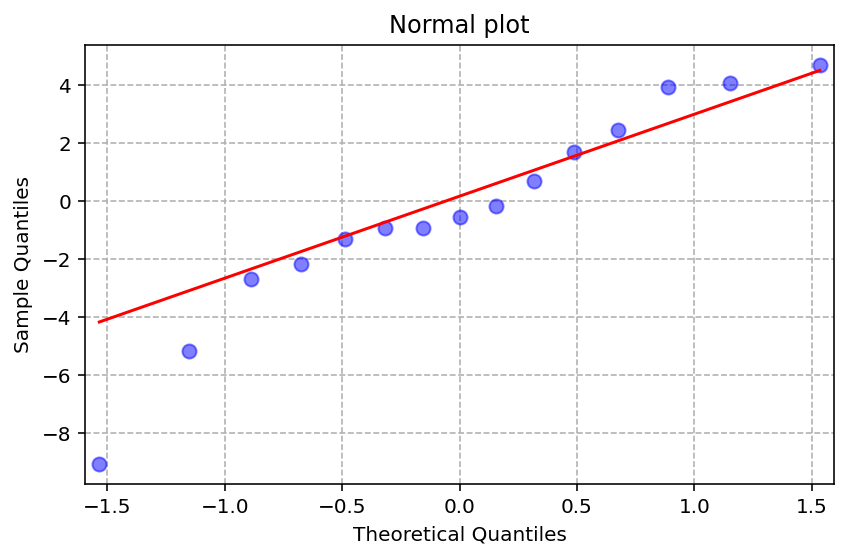

In [24]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

effects = effect_es['Effect Estimate'].values
sm.graphics.qqplot(effects,line='q', alpha=0.5, ms=7)
plt.title('Normal plot')
plt.tight_layout()
plt.grid(ls='--')
pass;

only two effects that clearly different from others are A and ABC.<br>
AB is ambiguous

#### Normal probability plot in Minitab style

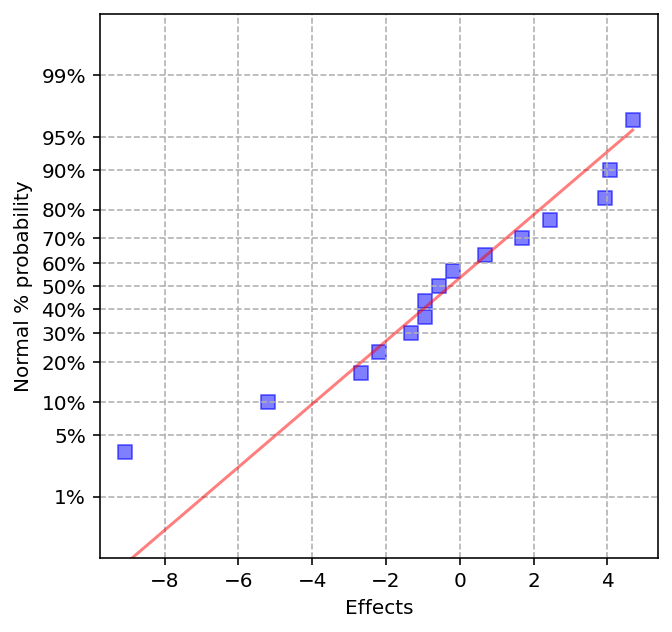

In [25]:
# Determine sample quantiles from normal distribution and plot them against the effects.
n = len(effects)
sample_cdf = (np.array(range(1, effects.size+1)) - 0.5)/n  
sample_q = stats.norm.ppf(sample_cdf)

_,ax = plt.subplots(figsize=(5,5))
plt.scatter(sorted(effects), sample_q, color='blue', marker='s', s=50, alpha=0.5)

# Set the % normal probability labels for the y-axis.
probs = np.array([1, 5,10,20,30,40,50,60,70,80,90,95,99])
theoretical_q = stats.norm.ppf(probs/100)
plt.yticks(theoretical_q, [str(x)+"%" for x in probs])
plt.ylim([-3,3])

# Generate a line passing through quantile 0.25 and 0.75 as the reference.
x1, x2 = np.quantile(effects, 0.25, interpolation='lower'), np.quantile(effects, 0.75, interpolation='lower')
y1, y2 = stats.norm.ppf(0.25), stats.norm.ppf(0.75)
m = (y2-y1)/(x2-x1) 
c = y1-m*x1
x = [sorted(effects)[0], sorted(effects)[-1]]
y = [m*sorted(effects)[0]+c, m*sorted(effects)[-1]+c]
ax.plot(x,y, color='red', alpha=0.5)


plt.grid(ls='--')
ax.set_xlabel('Effects')
ax.set_ylabel('Normal % probability')
pass;

Same as normal prob plot, A and ABC are significant.

#### Half normal probability plot

In [26]:
def plot_halfnormal(effects):
    # Determine sample quantiles from half-normal distribution and plot them against the effects.
    n = len(effects)
    sample_cdf = (np.array(range(1, effects.size+1)) - 0.5)/n  
    sample_q = stats.halfnorm.ppf(sample_cdf) 
    _,ax = plt.subplots(figsize=(5,5))
    abs_effects = sorted(np.abs(effects))
    plt.scatter(abs_effects, sample_q, color='blue', marker='s', s=50, alpha=0.5)
    plt.ylim([-0.1, 2.5])

    # Set the % normal probability labels for the y-axis.
    probs = np.array([1, 20, 40, 60,70,85,90,95,97,99])
    theoretical_q = stats.halfnorm.ppf(probs/100)
    plt.yticks(theoretical_q, [str(x)+"%" for x in probs])

    # Generate a line passing through the origin (0,0) and the median as the reference.
    x_median = np.quantile(abs_effects, 0.5, interpolation='lower')
    y_median = stats.halfnorm.ppf(0.5)
    m = y_median/x_median
    x = [0, abs_effects[-1]]
    y = [0, m*abs_effects[-1]]
    ax.plot(x,y, color='red', alpha=0.5)

    plt.grid(ls='--')
    ax.set_xlabel('Effects')
    ax.set_ylabel('Half-normal % probability')
    pass;

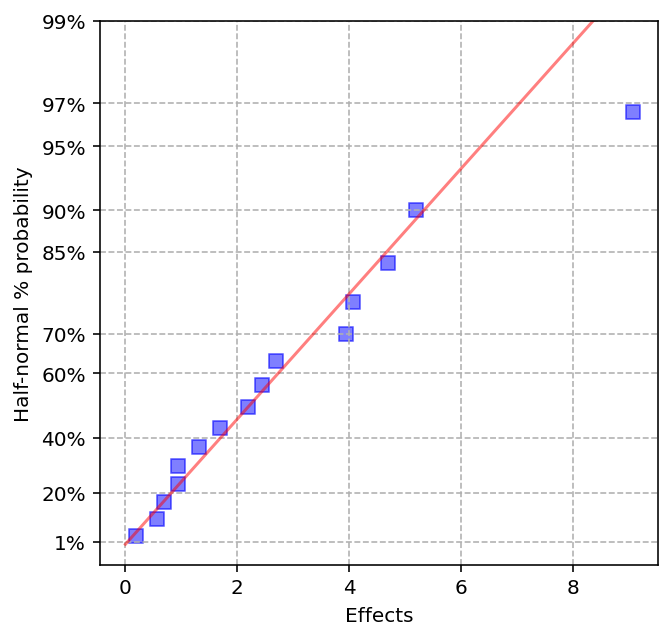

In [27]:
plot_halfnormal(effects)

only A is significant in half normal probability plot.<br>
Thus, these normal probability plot cannot detect all significant effects but determine the effect that obviously different from others.<br>
Once the effect appears, that variable is difinitely significant to the response.

#### Main effect and interaction plots

Text(0.5, 0, 'A')

Text(0, 0.5, 'Average yields')

Text(0.5, 0, 'B')

Text(0, 0.5, 'Average yields')

Text(0.5, 0, 'C')

Text(0, 0.5, 'Average yields')

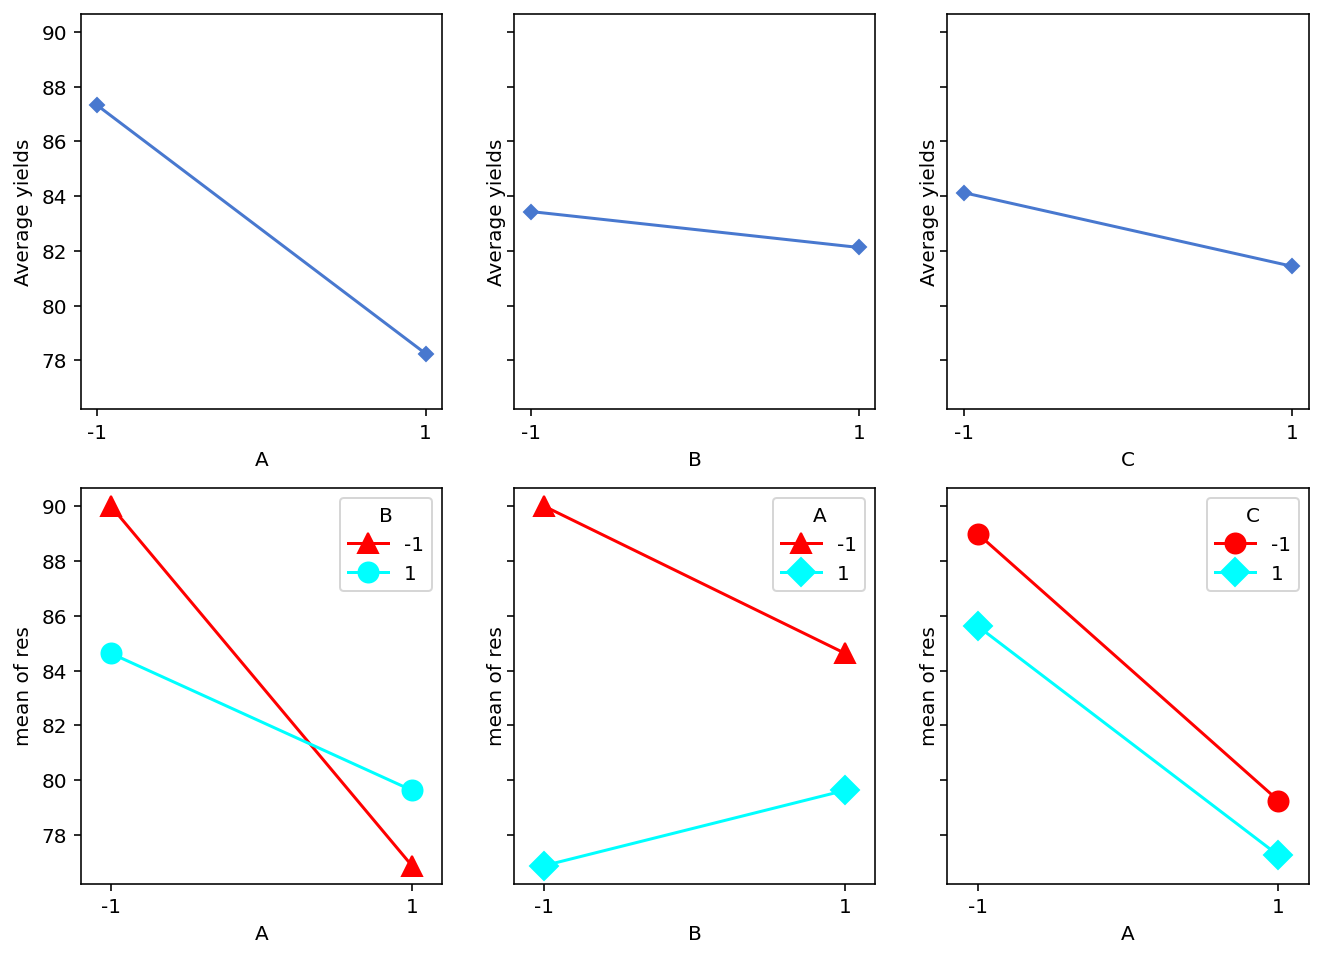

In [28]:
from statsmodels.graphics.factorplots import interaction_plot

f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharey=True, figsize=(11,8)) 

# Main effect A
eff_A = chem.groupby('A')[['res']].mean().reset_index()
ax1.plot(eff_A.A.astype(str), eff_A.res, ms = 5, marker = 'D')
ax1.set_xlabel('A')
ax1.set_ylabel('Average yields')

# Main effect B
eff_B = chem.groupby('B')[['res']].mean().reset_index()
ax2.plot(eff_B.B.astype(str), eff_B.res, ms = 5, marker = 'D')
ax2.set_xlabel('B')
ax2.set_ylabel('Average yields')

# Main effect C
eff_C = chem.groupby('C')[['res']].mean().reset_index()
ax3.plot(eff_B.B.astype(str), eff_C.res, ms = 5, marker = 'D')
ax3.set_xlabel('C')
ax3.set_ylabel('Average yields')

# AB interaction
figure = interaction_plot(chem['A'].astype(str), chem['B'].astype(str), chem['res'],
                         markers = ['^','o'], ms = 10, ax = ax4)

# BA interaction
figure = interaction_plot(chem['B'].astype(str), chem['A'].astype(str), chem['res'],
                         markers = ['^','D'], ms = 10, ax = ax5)

# AC interaction
figure = interaction_plot(chem['A'].astype(str), chem['C'].astype(str), chem['res'],
                         markers = ['o','D'], ms = 10, ax = ax6)

From main effect and interaction plot<br> Basically, increasing in A or B will decrease the average yields <br>
but at high B, the average of yields decrease slower than low B from $A_{low}$ to $A_{High}$ (ax5 and ax6 give same meaning but in different dimension)
<br><br>

In [17]:
mod1 = sm.OLS(chem['res'], chem[['Intercept','A', 'AB', 'ABC']]).fit()
mod1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.576   
Dependent Variable: res              AIC:                193.8204
Date:               2020-10-28 23:46 BIC:                199.6834
No. Observations:   32               Log-Likelihood:     -92.910 
Df Model:           3                F-statistic:        15.04   
Df Residuals:       28               Prob (F-statistic): 5.05e-06
R-squared:          0.617            Scale:              22.254  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     82.7813    0.8339  99.2655  0.0000  81.0730  84.4895
A             -4.5312    0.8339  -5.4336  0.0000  -6.2395  -2.8230
AB             2.0312    0.8339   2.4357  0.0215   0.3230   3.7395
ABC           -2.5938    0.8339  -3.1102  0.0043  -4.3020  -0.8855
-----------------------------------------------------------------
Omnibus:               1.855        Durbin-Watson:          1.927
Prob(Omnibus):         0.396        Jarque-Bera (JB):       0.783
Skew:                  -0.043       Prob(JB):               0.676
Kurtosis:              3.761        Condition No.:          1    
=================================================================

"""